# Fraud Detection Analysis 

## Introduction

This notebook provides an end-to-end analysis of a fraud detection dataset. The dataset contains anonymized credit card transactions, where each record is labeled as either fraudulent (Class = 1) or non-fraudulent (Class = 0). Our objective is to preprocess the data, explore it visually, and build a predictive model for detecting fraudulent transactions.

### Importing Libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import warnings
warnings.filterwarnings('ignore')

#### Load Dataset

In [3]:
data=pd.read_csv('/Users/kailash/Downloads/Credit Card Info.csv')

#### Display basic info 

In [4]:
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [5]:
data.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0
284806,172792.0,-0.533413,-0.189733,0.703337,-0.506271,-0.012546,-0.649617,1.577006,-0.414650,0.486180,...,0.261057,0.643078,0.376777,0.008797,-0.473649,-0.818267,-0.002415,0.013649,217.00,0


#### Data Overview

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [7]:
data.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

## Exploratory Data Analysis (EDA)

#### Class Distribution

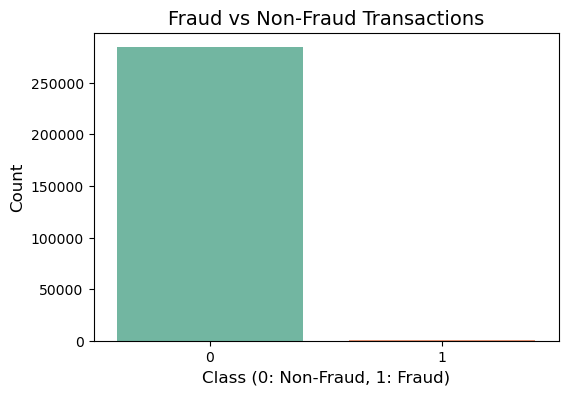

In [9]:
plt.figure(figsize=(6, 4))
sns.countplot(data=data, x='Class', palette='Set2')
plt.title('Fraud vs Non-Fraud Transactions', fontsize=14)
plt.xlabel('Class (0: Non-Fraud, 1: Fraud)', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()

#### Transaction Amount Distribution

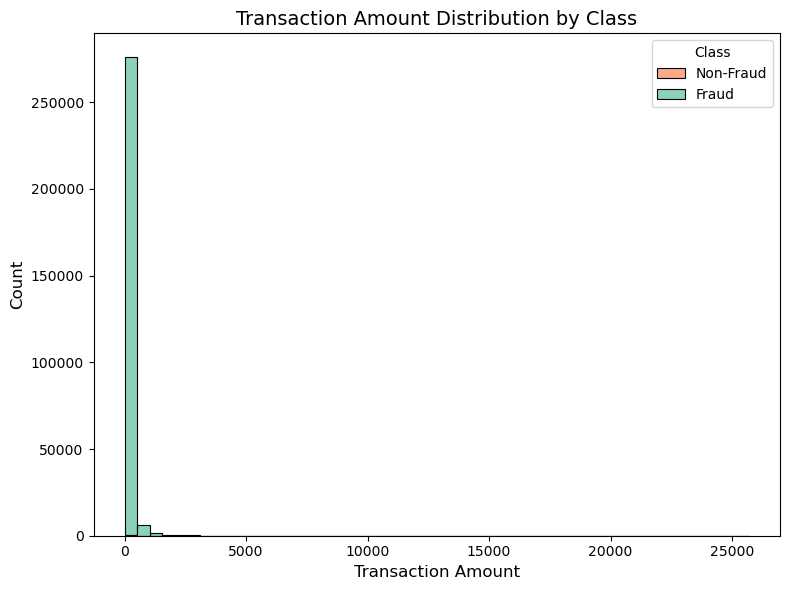

In [10]:
plt.figure(figsize=(8, 6))
sns.histplot(data=data, x='Amount', hue='Class', multiple='stack', palette='Set2', bins=50)
plt.title('Transaction Amount Distribution by Class', fontsize=14)
plt.xlabel('Transaction Amount', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.legend(title='Class', labels=['Non-Fraud', 'Fraud'], fontsize=10)
plt.tight_layout()  # Adjust layout to prevent overlaps
plt.show()

#### Time vs Transaction Amount

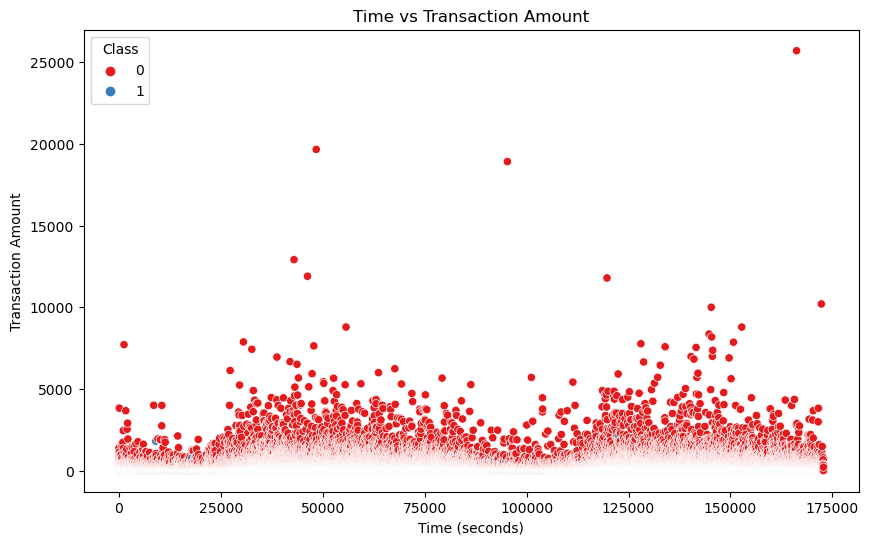

In [12]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=data, x='Time', y='Amount', hue='Class', palette='Set1')
plt.title('Time vs Transaction Amount')
plt.xlabel('Time (seconds)')
plt.ylabel('Transaction Amount')
plt.show()

#### Transaction Amount by Class

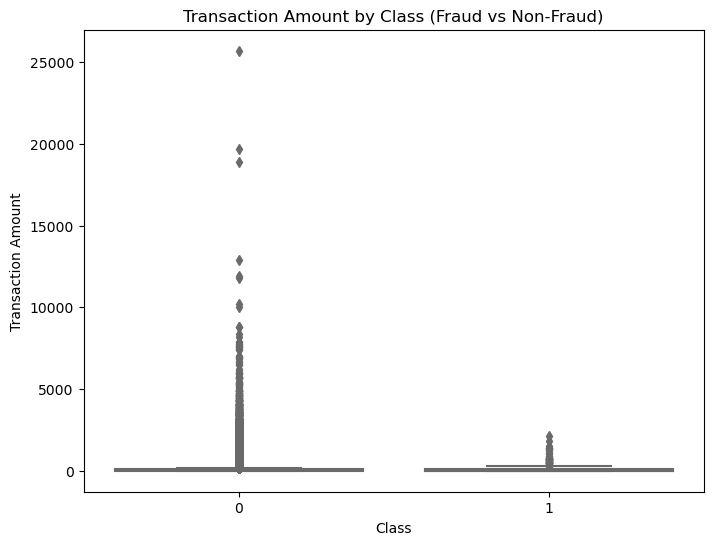

In [13]:
plt.figure(figsize=(8, 6))
sns.boxplot(data=data, x='Class', y='Amount', palette='Set3')
plt.title('Transaction Amount by Class (Fraud vs Non-Fraud)')
plt.xlabel('Class')
plt.ylabel('Transaction Amount')
plt.show()

#### Fraud Transactions Over Time

In [16]:
fraud = data[data['Class'] == 1]

fig = px.scatter(
    fraud,
    x='Time',
    y='Amount',
    title='Fraud Transactions Over Time',
    labels={'Time': 'Time (seconds)', 'Amount': 'Transaction Amount'},
    opacity=0.7
)

fig.update_traces(marker=dict(color='red', size=5))

fig.show()

#### Feature Distribution by Class

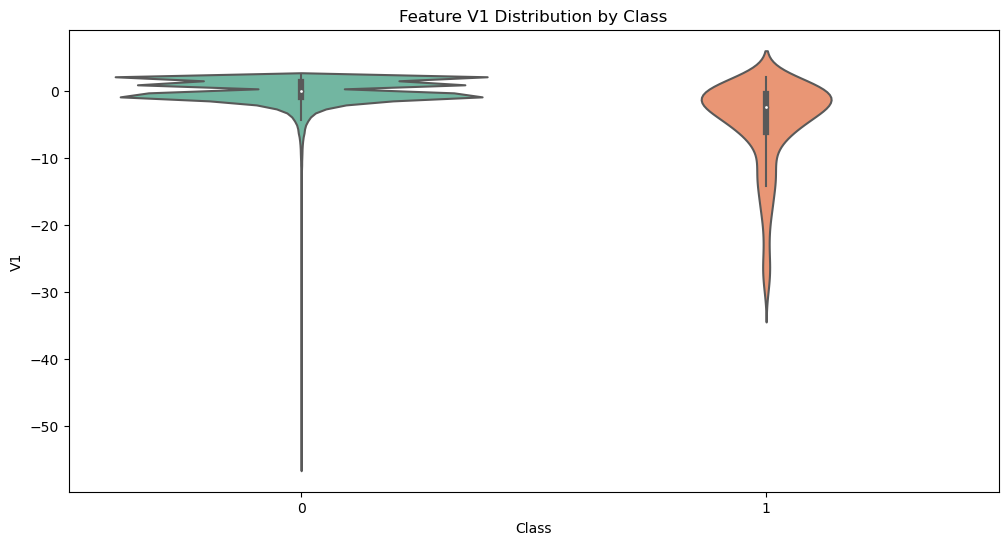

In [18]:
plt.figure(figsize=(12, 6))
sns.violinplot(data=data, x='Class', y='V1', palette='Set2')
plt.title('Feature V1 Distribution by Class')
plt.show()

## Data Preproccesing

In [19]:
data['Class'].value_counts()

Class
0    284315
1       492
Name: count, dtype: int64

In [20]:
legit = data[data.Class == 0]
fraud = data[data.Class == 1]

In [21]:
print(legit.shape)
print(fraud.shape)

(284315, 31)
(492, 31)


In [22]:
legit.Amount.describe()

count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64

In [23]:
fraud.Amount.describe()

count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

In [24]:
data.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [25]:
data.groupby('Class').mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0,94838.202258,0.008258,-0.006271,0.012171,-0.007860,0.005453,0.002419,0.009637,-0.000987,0.004467,...,-0.000644,-0.001235,-0.000024,0.000070,0.000182,-0.000072,-0.000089,-0.000295,-0.000131,88.291022
1,80746.806911,-4.771948,3.623778,-7.033281,4.542029,-3.151225,-1.397737,-5.568731,0.570636,-2.581123,...,0.372319,0.713588,0.014049,-0.040308,-0.105130,0.041449,0.051648,0.170575,0.075667,122.211321


In [26]:
legit_sample = legit.sample(n=492)

In [27]:
new_dataset = pd.concat([legit_sample, fraud], axis=0)

In [28]:
new_dataset.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
281863,170478.0,-0.604877,1.337048,0.975155,2.475457,2.204279,2.291555,0.709784,0.617522,-2.465126,...,0.319942,0.844229,-0.450095,-0.732920,0.773378,0.412548,-0.052906,-0.081319,2.28,0
269134,163546.0,0.327338,0.147343,-0.100280,-2.050332,0.223306,-0.975126,0.525372,-0.160708,-1.480479,...,0.138596,0.220092,-0.094018,-0.370201,-0.340181,-0.384868,0.017932,0.015844,2.39,0
276807,167308.0,-0.742918,0.895237,1.376781,-0.283362,-0.454989,-0.543159,0.068666,0.462693,0.133294,...,-0.075098,-0.309488,-0.020331,-0.001973,-0.318423,-0.529842,0.031764,0.076053,10.00,0
144705,86344.0,-1.040132,0.356891,0.912142,0.132454,0.207077,0.074975,-0.015837,0.604615,-0.336793,...,0.128091,0.217078,-0.179876,-0.438981,-0.086064,0.375696,-0.017896,-0.008999,40.00,0
225598,144313.0,-0.525783,0.650168,-0.406914,-1.034624,3.480982,3.510990,0.486101,0.714986,-0.735388,...,-0.379061,-1.043272,-0.266845,0.621983,0.361481,0.495090,-0.150262,-0.149732,1.98,0


In [29]:
new_dataset.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
279863,169142.0,-1.927883,1.125653,-4.518331,1.749293,-1.566487,-2.010494,-0.882850,0.697211,-2.064945,...,0.778584,-0.319189,0.639419,-0.294885,0.537503,0.788395,0.292680,0.147968,390.00,1
280143,169347.0,1.378559,1.289381,-5.004247,1.411850,0.442581,-1.326536,-1.413170,0.248525,-1.127396,...,0.370612,0.028234,-0.145640,-0.081049,0.521875,0.739467,0.389152,0.186637,0.76,1
280149,169351.0,-0.676143,1.126366,-2.213700,0.468308,-1.120541,-0.003346,-2.234739,1.210158,-0.652250,...,0.751826,0.834108,0.190944,0.032070,-0.739695,0.471111,0.385107,0.194361,77.89,1
281144,169966.0,-3.113832,0.585864,-5.399730,1.817092,-0.840618,-2.943548,-2.208002,1.058733,-1.632333,...,0.583276,-0.269209,-0.456108,-0.183659,-0.328168,0.606116,0.884876,-0.253700,245.00,1
281674,170348.0,1.991976,0.158476,-2.583441,0.408670,1.151147,-0.096695,0.223050,-0.068384,0.577829,...,-0.164350,-0.295135,-0.072173,-0.450261,0.313267,-0.289617,0.002988,-0.015309,42.53,1


In [30]:
new_dataset['Class'].value_counts()

Class
0    492
1    492
Name: count, dtype: int64

In [31]:
new_dataset.groupby('Class').mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0,93970.288618,-0.070214,-0.035488,0.021729,-0.010289,0.025787,0.016433,0.101988,-0.064952,-0.032812,...,-0.001449,0.020298,-0.036987,-0.006228,-0.00846,0.014519,0.012552,0.003481,-0.020323,104.217175
1,80746.806911,-4.771948,3.623778,-7.033281,4.542029,-3.151225,-1.397737,-5.568731,0.570636,-2.581123,...,0.372319,0.713588,0.014049,-0.040308,-0.10513,0.041449,0.051648,0.170575,0.075667,122.211321


## Model Development 

In [32]:
X = new_dataset.drop(columns='Class', axis=1)
Y = new_dataset['Class']

In [34]:
X

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
281863,170478.0,-0.604877,1.337048,0.975155,2.475457,2.204279,2.291555,0.709784,0.617522,-2.465126,...,-0.119672,0.319942,0.844229,-0.450095,-0.732920,0.773378,0.412548,-0.052906,-0.081319,2.28
269134,163546.0,0.327338,0.147343,-0.100280,-2.050332,0.223306,-0.975126,0.525372,-0.160708,-1.480479,...,-0.069255,0.138596,0.220092,-0.094018,-0.370201,-0.340181,-0.384868,0.017932,0.015844,2.39
276807,167308.0,-0.742918,0.895237,1.376781,-0.283362,-0.454989,-0.543159,0.068666,0.462693,0.133294,...,-0.176134,-0.075098,-0.309488,-0.020331,-0.001973,-0.318423,-0.529842,0.031764,0.076053,10.00
144705,86344.0,-1.040132,0.356891,0.912142,0.132454,0.207077,0.074975,-0.015837,0.604615,-0.336793,...,0.061481,0.128091,0.217078,-0.179876,-0.438981,-0.086064,0.375696,-0.017896,-0.008999,40.00
225598,144313.0,-0.525783,0.650168,-0.406914,-1.034624,3.480982,3.510990,0.486101,0.714986,-0.735388,...,0.298897,-0.379061,-1.043272,-0.266845,0.621983,0.361481,0.495090,-0.150262,-0.149732,1.98
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
279863,169142.0,-1.927883,1.125653,-4.518331,1.749293,-1.566487,-2.010494,-0.882850,0.697211,-2.064945,...,1.252967,0.778584,-0.319189,0.639419,-0.294885,0.537503,0.788395,0.292680,0.147968,390.00
280143,169347.0,1.378559,1.289381,-5.004247,1.411850,0.442581,-1.326536,-1.413170,0.248525,-1.127396,...,0.226138,0.370612,0.028234,-0.145640,-0.081049,0.521875,0.739467,0.389152,0.186637,0.76
280149,169351.0,-0.676143,1.126366,-2.213700,0.468308,-1.120541,-0.003346,-2.234739,1.210158,-0.652250,...,0.247968,0.751826,0.834108,0.190944,0.032070,-0.739695,0.471111,0.385107,0.194361,77.89
281144,169966.0,-3.113832,0.585864,-5.399730,1.817092,-0.840618,-2.943548,-2.208002,1.058733,-1.632333,...,0.306271,0.583276,-0.269209,-0.456108,-0.183659,-0.328168,0.606116,0.884876,-0.253700,245.00


In [35]:
Y

281863    0
269134    0
276807    0
144705    0
225598    0
         ..
279863    1
280143    1
280149    1
281144    1
281674    1
Name: Class, Length: 984, dtype: int64

In [36]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, stratify=Y, random_state=2)

In [37]:
print(X.shape, X_train.shape, X_test.shape)

(984, 30) (787, 30) (197, 30)


In [38]:
model = LogisticRegression()

In [39]:
model.fit(X_train, Y_train)

LogisticRegression()

In [40]:
X_train_prediction = model.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction, Y_train)

In [41]:
print('Accuracy on Training data : ', training_data_accuracy)

Accuracy on Training data :  0.9377382465057179


In [42]:
X_test_prediction = model.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, Y_test)

In [43]:
print('Accuracy score on Test Data : ', test_data_accuracy)

Accuracy score on Test Data :  0.9187817258883249


### Aditional Parameters

#### Correlation Heatmap

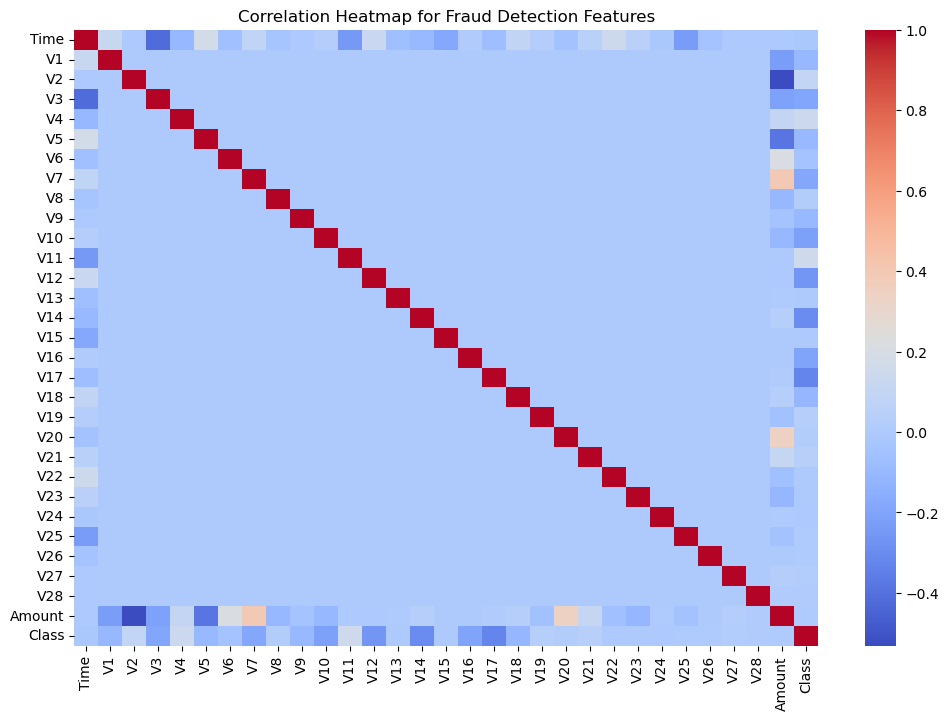

In [46]:
plt.figure(figsize=(12, 8))
correlation_matrix = data.corr()
sns.heatmap(correlation_matrix, cmap='coolwarm', annot=False, fmt=".2f")
plt.title('Correlation Heatmap for Fraud Detection Features')
plt.show()

#### Feature Importances for Fraud Detection

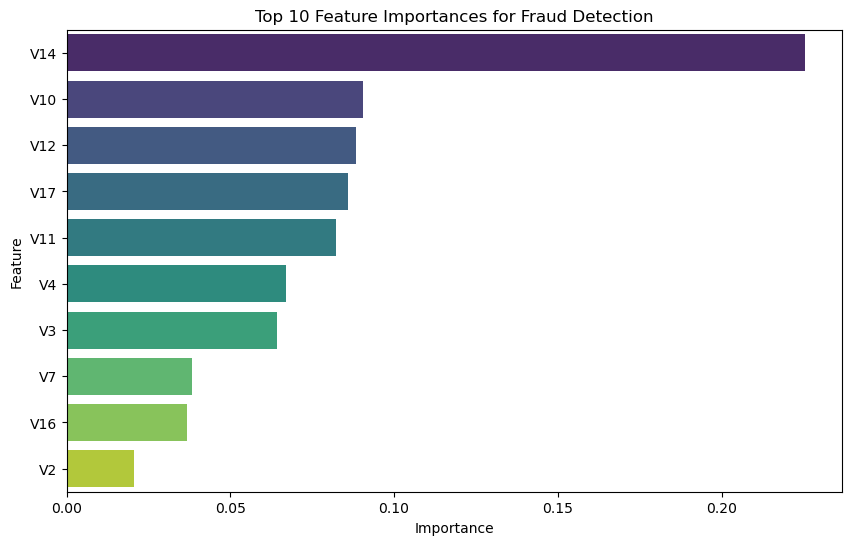

In [47]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(random_state=2)
rf_model.fit(X_train, Y_train)

importances = rf_model.feature_importances_
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df.head(10), palette='viridis')
plt.title('Top 10 Feature Importances for Fraud Detection')
plt.show()

#### Confusion Matrix for Fraud Detection

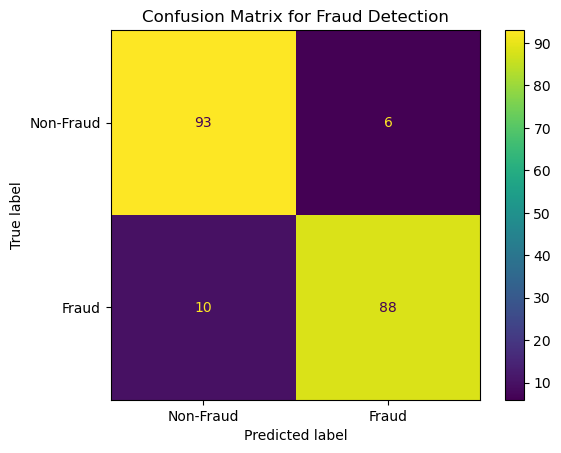

In [51]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Get confusion matrix
cm = confusion_matrix(Y_test, X_test_prediction)

# Plot confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Non-Fraud', 'Fraud'])
disp.plot(cmap='viridis')
plt.title('Confusion Matrix for Fraud Detection')
plt.show()
